# PROJETO FINAL DATA SCIENCE
#### Aluno(a)
- Patrícia Ferreira da Silva


## Previsão de Doenças Cardíacas

## I - Esposição do problema

Vários fatores influência em doeças cardíacas, são os níveis de colesterol, histórico familiar, obesidade entre outros, prever 
e diagnosticar doenças cardíacas é um desafio que depende de fatores como exames, sitomas e sinais do paciente.Os problemas
cardíacos é visto como a doença mais mortal, pois o coração não é capaz de empurrar a quantidade necessária de sangue para os
orgãos restante do corpo humano. Neste projeto vamos realizar uma tarefa de previsão de doenças cardíacas utilizando EDA, algoritimo de LogisticRegression e Randon Forest.



##  importação das bibliotecas

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from keras.layers import Dense
import keras
import tensorflow as tf
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.models import load_model



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import random
import time
random.seed(100)
import os
try:
    import theano
except:
    !pip install Theano
import theano
import keras
import tensorflow
sns.set()
from keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
   #empty model
classifier = Sequential()

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
%matplotlib inline

### II  -   Importação dos dados
###      Lendo os dados

In [40]:
df = pd.read_csv("heart_dowload_2.csv", sep=';')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


##### Descriptografia em atributos da página da Web da fonte de dados:

In [41]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

1- age - idade em anos

2- sex - sexo (1 = masculino; 0 = feminino)

3- cp - tipo de dor torácica (1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 4 = assintomática)

4- trestbps - pressão arterial em repouso (em mm Hg na admissão ao hospital)

5- chol - soro colestoral em mg/dl, mior que 200 é ruim

6- fbs - glicemia em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso)

7- restecg - resultados eletrocardiográficos de repouso (0 = normal; 1 = com ST-T; 2 = hipertrofia)

8- thalach - frequência cardíaca máxima atingida

9- exang - angina induzida pelo exercício (1 = sim; 0 = não)

10- oldpeak (pico antigo) - depressão do segmento ST induzida pelo exercício em relação ao repouso

11- slope (inclinação) - a inclinação do segmento ST do exercício de pico (1 = ascendente; 2 = plano; 3 = descendente)

12 - ca - número de vasos principais (0-3) coloridos por fluorosopia

13- thal - 1 = normal; 2 = defeito corrigido; 3 = defeito reversível


## III -  Preparação dos dados

##### Verificando entradas nulas no dataframe

In [42]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
df.shape

(1025, 14)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [46]:
df.shape

(1025, 14)

#### Removendo valores duplicados

In [47]:
df.duplicated().any()

True

In [48]:
df2 = df.drop_duplicates()

In [49]:
df.shape, df2.shape

((1025, 14), (302, 14))

In [50]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00
mean,54.42,0.68,0.96,131.60,246.50,0.15,0.53,149.57,0.33,1.04,1.40,0.72,2.31,0.54
std,9.05,0.47,1.03,17.56,51.75,0.36,0.53,22.90,0.47,1.16,0.62,1.01,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,133.25,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.50,1.00,1.00,130.00,240.50,0.00,1.00,152.50,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.75,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


###### Aredondado os valores para duas casas decimais

In [51]:
pd.set_option("display.float", "{:.2f}".format)
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00
mean,54.42,0.68,0.96,131.60,246.50,0.15,0.53,149.57,0.33,1.04,1.40,0.72,2.31,0.54
std,9.05,0.47,1.03,17.56,51.75,0.36,0.53,22.90,0.47,1.16,0.62,1.01,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,133.25,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.50,1.00,1.00,130.00,240.50,0.00,1.00,152.50,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.75,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


## Removendo Outliers

<AxesSubplot:>

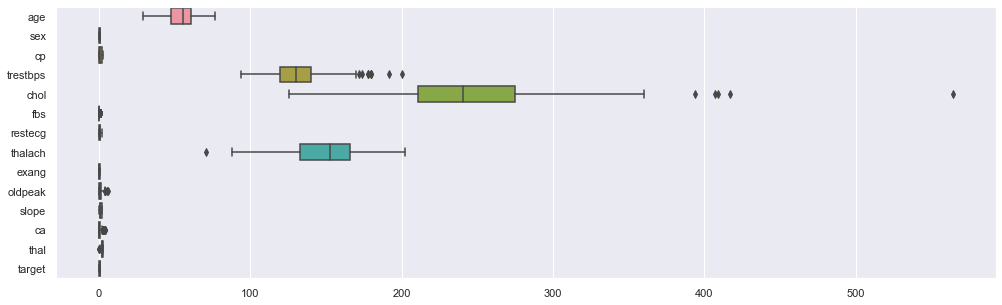

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df2,orient='h')

outliers on right side in chol is 
 123    417
158    564
179    409
255    394
450    407
Name: chol, dtype: int64 



<AxesSubplot:xlabel='chol'>

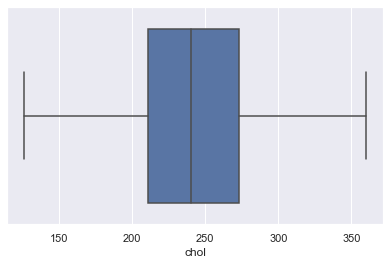

In [53]:
q1 = df2.chol.quantile(0.25)
q3 = df2.chol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
k1=df2[df2["chol"]>upper_limit]
print("outliers on right side in chol is \n",k1["chol"],"\n")
df2=df2[df2["chol"]<upper_limit]
sns.boxplot(df2["chol"])

In [54]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.28,0.69,0.97,131.53,243.27,0.15,0.54,149.47,0.33,1.03,1.40,0.71,2.31,0.54
std,9.05,0.46,1.03,17.64,45.00,0.36,0.53,23.08,0.47,1.16,0.62,1.00,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.00,0.00,0.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.70,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,273.00,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,360.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


<AxesSubplot:>

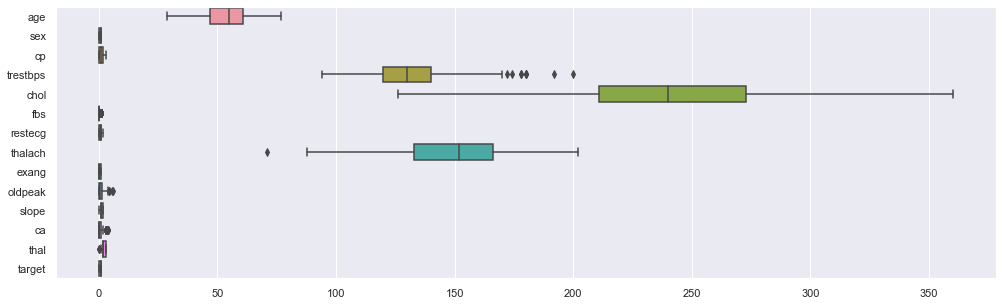

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df2,orient='h')

<AxesSubplot:xlabel='trestbps'>

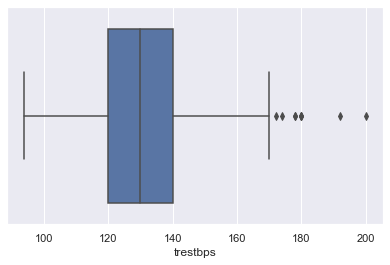

In [57]:
q1 = df2.trestbps.quantile(0.25)
q3 = df2.trestbps.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
k1=df2[df2["chol"] > upper_limit]
data2=df2[df2["trestbps"] < upper_limit]
sns.boxplot(df2["trestbps"])

<AxesSubplot:>

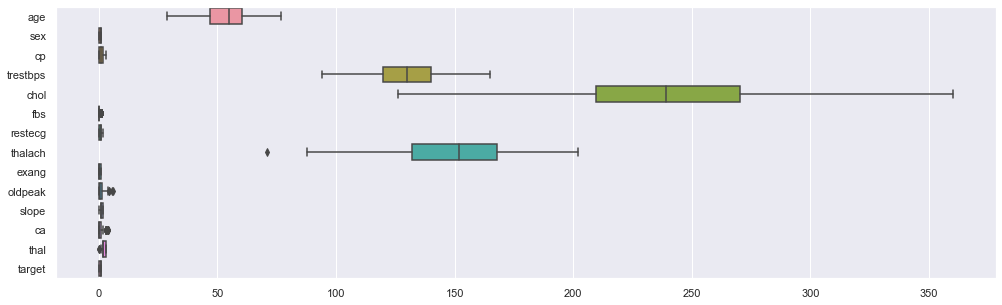

In [58]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data2,orient='h')

<AxesSubplot:xlabel='thalach'>

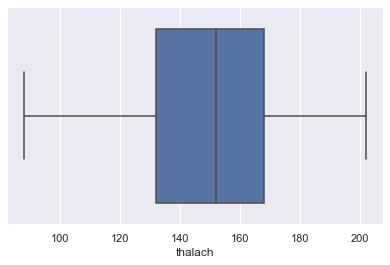

In [59]:
q1 = df2.thalach.quantile(0.25)
q3 = df2.thalach.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
k1=df2[df2["thalach"] < lower_limit]
data2=data2[data2["thalach"] > lower_limit]
sns.boxplot(data2["thalach"])

<AxesSubplot:>

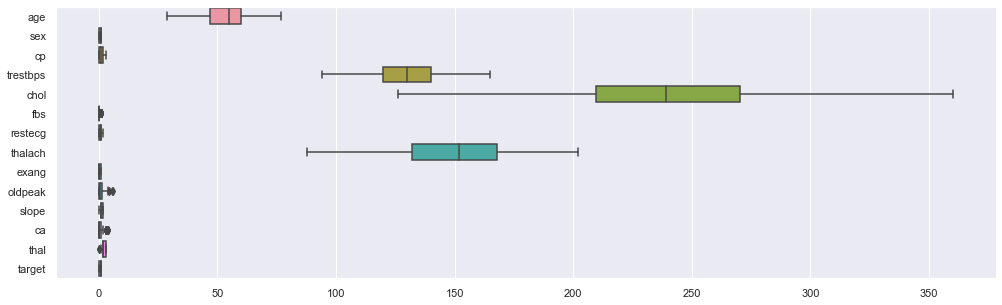

In [60]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data2,orient='h')

In [61]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00,283.00
mean,54.00,0.70,0.96,129.44,242.07,0.14,0.54,149.67,0.32,1.00,1.42,0.72,2.30,0.55
std,9.11,0.46,1.02,14.78,44.89,0.35,0.52,22.86,0.47,1.13,0.61,1.01,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,88.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.00,0.00,0.00,120.00,209.50,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,239.00,0.00,1.00,152.00,0.00,0.60,1.00,0.00,2.00,1.00
75%,60.00,1.00,2.00,140.00,270.50,0.00,1.00,168.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,165.00,360.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [62]:
data2.shape

(283, 14)

#### Verificar variavel target( saber se temos um problema de classificação ou regressão)

In [63]:

print(df['target'].unique())


[0 1]


#### Temos um problema de classificação, pois queremos saber se o paciente tem ou não tem doenças cardíacas e quais fatores influencia para isto

### IV- Análise Exploratória

#### Age x oldpeak

Text(0, 0.5, 'oldpeak')

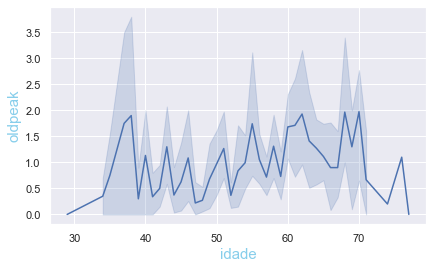

In [64]:
X = data2["age"].values
Y = data2["oldpeak"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("idade", fontsize = 15,color="skyblue")
line_plot.set_ylabel("oldpeak", fontsize = 15,color="skyblue")

### Observações do gráfico acima
- Pessoas entre 40 e 50 anos tem os batimentos menos elevado, já as 
pessoas entre 60 e 70 anos tem os batimentos mais alto


## Verificando quantidade pessoas com problemas cardíacos

Text(0.5, 21.200000000000003, 'target')

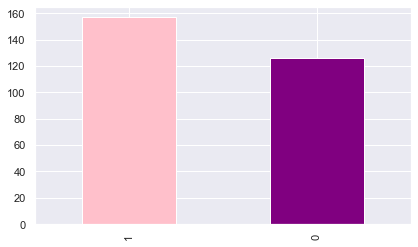

In [65]:
data2.target.value_counts().plot(kind="bar", color=["pink", "purple"]) 
line_plot.set_xlabel("target", fontsize = 15,color="skyblue")



#### Observações do gráfico acima
- Temos em aproximadamente 165 pessoas com problemas e 140 sem problemas cardiacos

### Verificando problemas cardíacos com sexo (F) (M)

Text(0.5, 21.200000000000003, 'sex')

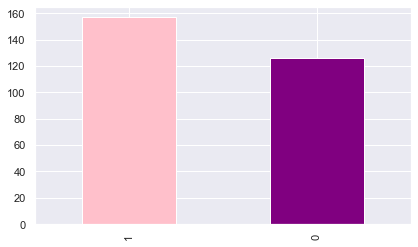

In [66]:
data2.target.value_counts().plot(kind="bar", color=["pink", "purple"]) 
line_plot.set_xlabel("sex", fontsize = 15,color="skyblue")



#### Observações do gráfico acima
- Problemas cardíacos acontece mais em pessoas do sexo Masculino

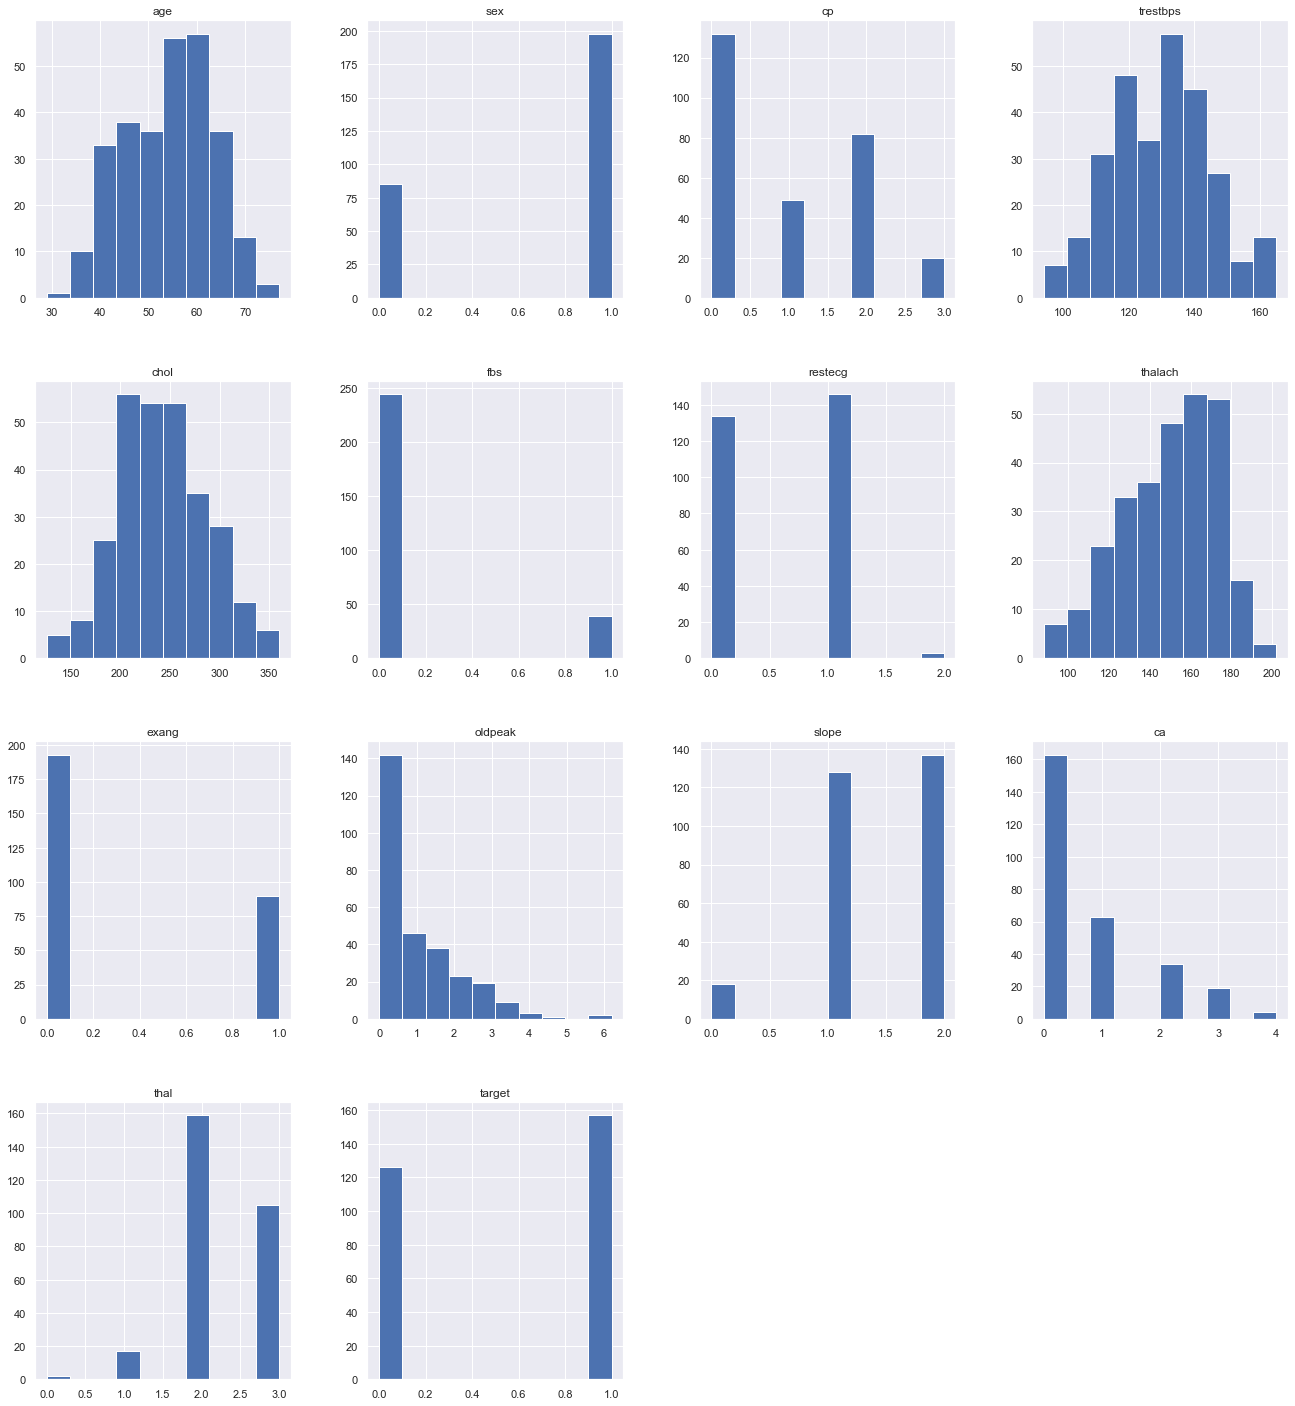

In [67]:
p = data2.hist(figsize = (20,25))

#### Observações do gráfico acima:

- Age- A maioria das pessoas tem idade entre 55 e 65 anos.
- CP-(dor no peito) pessoas com dor toráxica com valores 1,2,3 são mais propensas a ter doenças cardíacas do que pessoas com cp0.
- trestbps- 9pressão em repouso) valores acima de 130  é preocupante.
- Chol- Soro colestoral maior que 200 é ruim.
- Fbs- A maioria das pessoas não tem glicemia alta.
- Thalach-  A maioria dos pacientes tiveram frequencia car´diaca entre 150 e 175 bpm.

- restecg- {resultados eletrocardiográficos de repouso}: Pessoas com um valor de 1 (relatando um ritmo cardíaco anormal, que pode variar de sintomas leves a problemas graves) têm maior probabilidade de ter doenças cardíacas.

- exang {angina induzida por exercício( a angina ocorre em resposta ao esforço e é aliviada durante o repouso.}: pessoas com valor 1 (SIM) são mais propensas a ter problemas cardíacos.

- ca {número de vasos principais (0-3) corados por fluoroscopia}: quanto mais circulação de sangue, melhor, então pessoas com ca igual a 0 são mais propensas a ter doenças cardíacas.

- tal {resultado de estresse de tálio}: Pessoas com um valor thal de 2 (defeito corrigido: uma vez foi um defeito, mas agora está ok) são mais propensos a ter doenças cardíacas.

### Comparando pessoas que tem e não tem doenças cardíacas

 - Antes vamos criar variaveis categoricas e  continuas

In [68]:
categorical_val = []
continous_val = []
for column in data2.columns:
    print('==============================')
    print(f"{column} : {data2[column].unique()}")
    if len(df2[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 129 150 146 117 152 154 134 144 108 123 110 142 126  94 165 115
 102 105 155 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 169 131 269 196 231 213 271 263 229
 360 258 330 342 226 278 230 283 241 175 188 217 193 245 232 299 197 315
 215 164 207 177 257 255 187 201 220 268 267 236 303 282 126 309 186 275
 281 206 335 218 254 295 260 240 302 192 235 274 234 182 167 172 321 300
 199 157 304 222 184 354 160 247 239 246 293 180 250 221 200 243 311 261
 242 205 306 288 219 353 198 183 224 265 228 313 340 259 270 325 227 216
 264 276 322 214 273 253 176 284 305 168 225 290 277 262 195 166 178 141]
fbs : [0 1]
restecg : [1 0 2]
thalach : [168 155 125 161 106 122 1

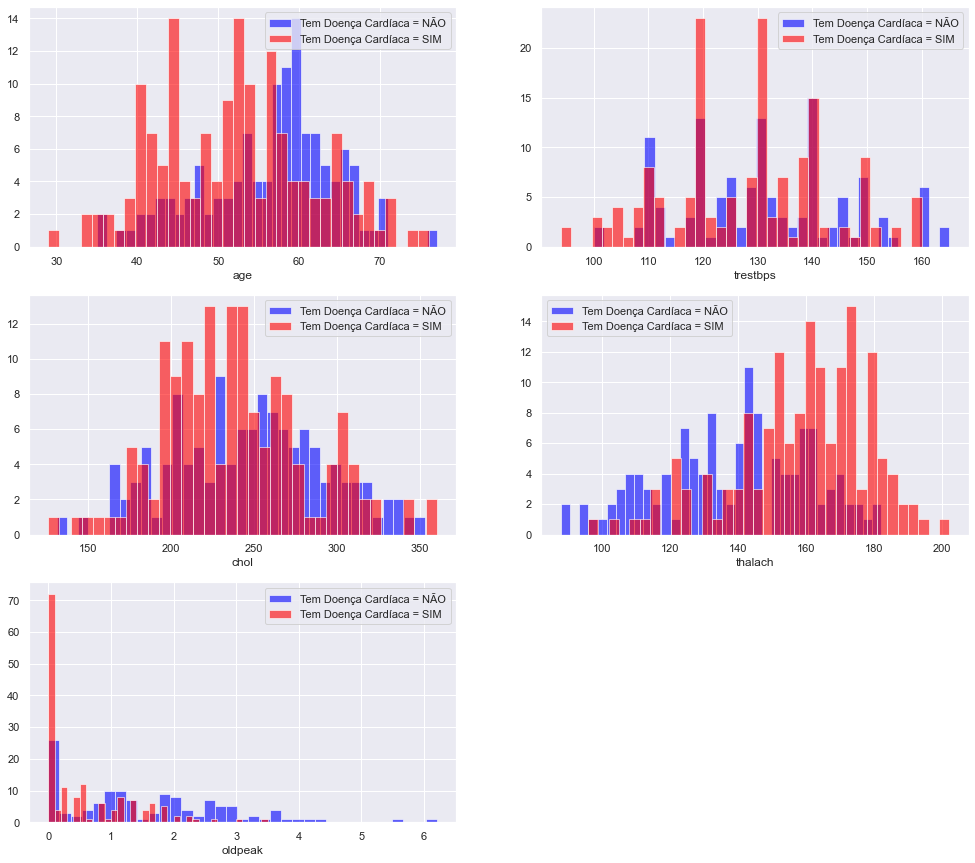

In [69]:
 
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data2[data2["target"] == 0][column].hist(bins=35, color='blue', label='Tem Doença Cardíaca = NÃO', alpha=0.6)
    data2[data2["target"] == 1][column].hist(bins=35, color='red', label='Tem Doença Cardíaca = SIM', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

#### Observações do gráfico acima:

- idade : pessoas entre 42 e 53 anos são mais propensas a ter doenças cardiacas

- trestbps: pressão arterial em repouso acima de 120 tem mais riscos de problemas cardiacos

- col: maior que 200 é preocupante.

- thalach: Pessoas com um máximo de mais de 145 são mais propensas a ter doenças cardíacas.

- Oldepeak (antigo pico) de depressão do segmento ST induzida pelo exercício versus repouso analisa o estresse cardíaco durante o exercício um coração não saudável se estressará mais.

### Matriz de correlção

(14.5, -0.5)

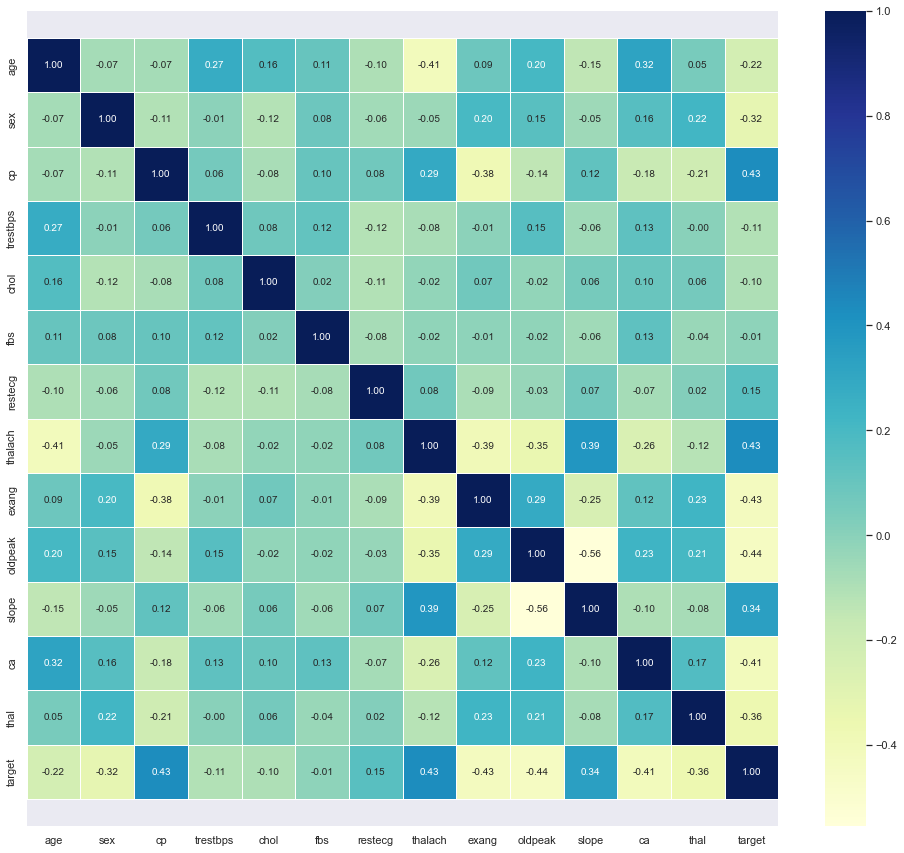

In [70]:
corr_matrix = data2.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'correlação com target'}>

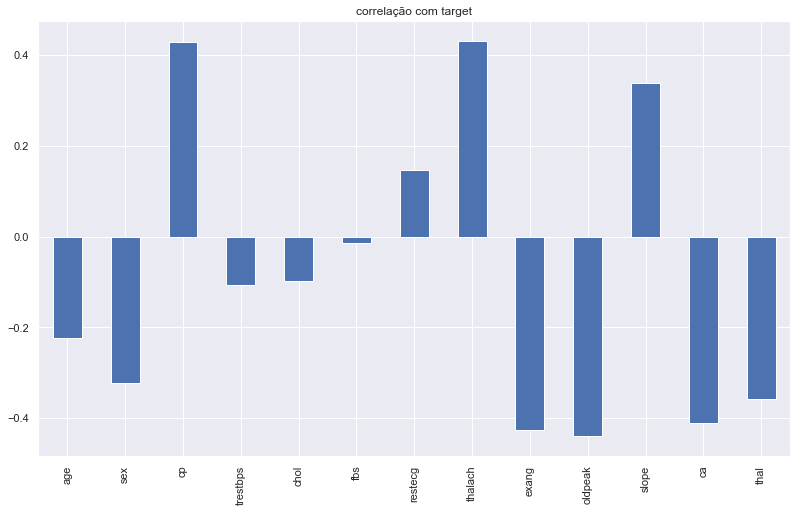

In [71]:
data2.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12,8), title="correlação com target")

#### Observção do gráfico acima
cp e chol são as váriaveis com menos correlação com target, todas as outras tem uma correlação significativa.

#### Age X fbs (glicemia alta)

Text(0, 0.5, 'fbs')

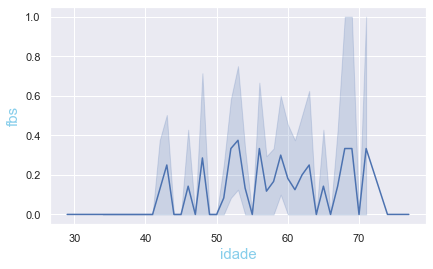

In [72]:
X = data2["age"].values
Y = data2["fbs"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("idade", fontsize = 15,color="skyblue")
line_plot.set_ylabel("fbs", fontsize = 15,color="skyblue")

##### Observação do gráfico acima
 Percebe que tem poucas pessoas com a glicemia alta, porém é um fator de alta correlação para problemas cardíacos, ou seja pessoas com a glicemia alta pode desenvolve problemas cardíacos.

## PROCESSAMENTO DE DADOS

##### Iremos utilizar Logist Regression e Randon Forest

### Treino e Teste

In [73]:
x = data2.drop('target',axis=1)
y = data2['target']

In [74]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=42)


### Fetuare Scaling normalização dos dados


In [80]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[-1.37046121,  0.65759595, -0.98367544, ...,  0.94064762,
        -0.67382064,  1.13858757],
       [-0.0690602 , -1.52069063, -0.98367544, ...,  0.94064762,
        -0.67382064, -0.4706162 ],
       [ 1.01544065,  0.65759595, -0.98367544, ...,  0.94064762,
         1.28302834,  1.13858757],
       ...,
       [ 0.36474014,  0.65759595, -0.98367544, ..., -0.65469074,
         0.30460385,  1.13858757],
       [ 0.79854048,  0.65759595, -0.98367544, ..., -0.65469074,
         0.30460385, -0.4706162 ],
       [-0.17751028,  0.65759595,  1.03119599, ...,  0.94064762,
         3.23987731, -0.4706162 ]])

In [81]:
x_test = scaler.transform(x_test)
x_test

array([[ 0.03938989,  0.65759595, -0.98367544, -0.48601616,  0.99956659,
        -0.41384867, -1.068716  , -1.5101722 ,  1.52069063,  2.07019142,
        -0.65469074,  1.28302834, -0.4706162 ],
       [-1.37046121,  0.65759595,  1.03119599,  0.06719418, -0.6237321 ,
        -0.41384867, -1.068716  ,  0.7545725 , -0.65759595,  0.96793797,
        -0.65469074, -0.67382064, -0.4706162 ],
       [-1.37046121,  0.65759595,  1.03119599, -1.17752909,  0.18791724,
        -0.41384867,  0.90143872,  1.23365311, -0.65759595, -0.86915111,
         0.94064762, -0.67382064, -0.4706162 ],
       [ 0.6900904 ,  0.65759595, -0.98367544,  0.06719418, -0.80409862,
        -0.41384867, -1.068716  , -0.81332767,  1.52069063,  1.33535579,
        -0.65469074,  1.28302834,  1.13858757],
       [ 0.90699057, -1.52069063, -0.98367544, -0.34771358, -0.73646118,
        -0.41384867,  0.90143872,  0.53680859, -0.65759595, -0.86915111,
         0.94064762, -0.67382064, -0.4706162 ],
       [ 1.23234082,  0.657595

### Logist Regression

In [82]:

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [83]:
lr_pred = lr.predict(x_test)
pd.DataFrame(np.c_[y_test,lr_pred],columns=['Actual','Predicted']).head(5)


,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


 Test Accuracy score :  83.1 %
Train Accuracy score :  84.43 %
----------------------
Classification Report
----------------------


Text(5.300000000000001, 0.5, 'Predicted Values')

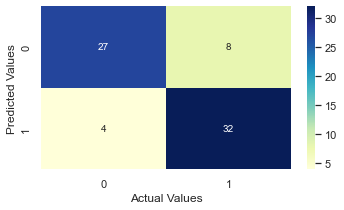

In [84]:
print(" Test Accuracy score : ",round(lr.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(lr.score(x_train,y_train)*100,2),"%")
print("----------------------")
print("Classification Report")
print("----------------------")
con = confusion_matrix(lr_pred,y_test)
plt.figure(figsize=(5,3))
sns.heatmap(con, annot=True,cmap="YlGnBu",fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
#print(classification_report(y_test,lr_pred))


In [85]:
auc = roc_auc_score(y_test,lr_pred)
auc

0.835483870967742

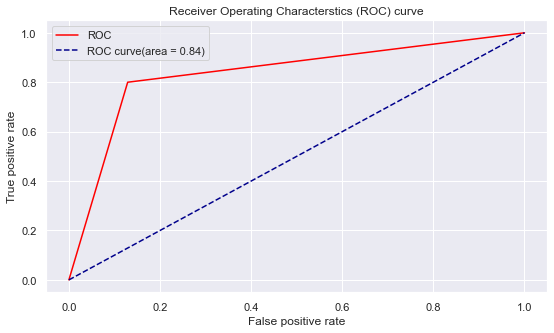

In [86]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,lr_pred)
plt.figure(figsize=(8,5))
plt.plot(fpr , tpr , color='red',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

### Random forest

In [87]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [88]:
rfc_pred = rfc.predict(x_test)
pd.DataFrame(np.c_[y_test,rfc_pred],columns=['Actual','Predicted']).head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


 Test Accuracy score :  90.14 %
Train Accuracy score :  90.57 %
----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.90      0.93      0.91        40

    accuracy                           0.90        71
   macro avg       0.90      0.90      0.90        71
weighted avg       0.90      0.90      0.90        71



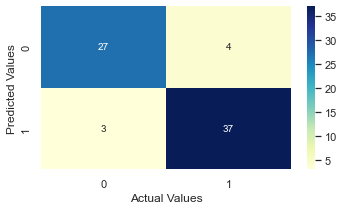

In [89]:
print(" Test Accuracy score : ",round(rfc.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(rfc.score(x_train,y_train)*100,2),"%")
clf_con = confusion_matrix(y_test,rfc_pred)
print("----------------------")
print("Classification Report")
print("----------------------")
print(classification_report(y_test,rfc_pred))
plt.figure(figsize=(5,3))
sns.heatmap(clf_con, annot=True,cmap="YlGnBu",fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [90]:
auc = roc_auc_score(y_test,rfc_pred)
auc

0.897983870967742

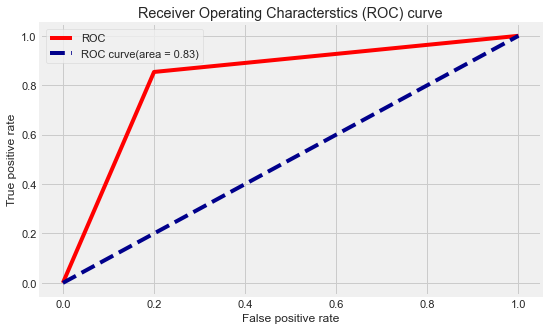

In [407]:
fpr, tpr, thresholds = roc_curve(y_test,rfc_pred)
plt.figure(figsize=(8,5))
plt.plot(fpr , tpr , color='red',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

### Comparação entre os Modelos

In [91]:
data = { 'Models' : ['Logistic Regression','Random Forest'],
         'Test Accuracy' : [round(lr.score(x_test,y_test)*100,2), round(rfc.score(x_test,y_test)*100,2)],
         'Train Accuracy': [round(lr.score(x_train,y_train)*100,2),round(rfc.score(x_train,y_train)*100,2)],
       }

df = pd.DataFrame(data)
df.sort_values(by='Test Accuracy',ascending=False)

,Models,Test Accuracy,Train Accuracy
1,Random Forest,90.14,90.57
0,Logistic Regression,83.10,84.43


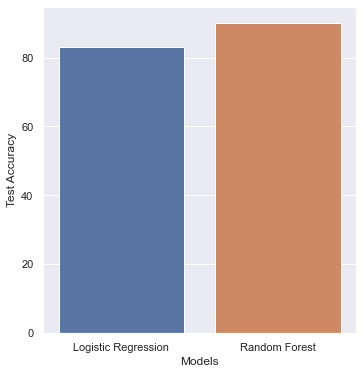

In [92]:
plt.figure(figsize = (5,6))
sns.barplot(x='Models', y='Test Accuracy',data=df)
plt.show()

### Análise dos modelos 
##### Utilazamos dois modelos de algoritmos diferentes, o que melhor performou foi o Randon Forest pois o percentual  da sua acuracy é melhor.

# Otimizar os modelos

### RandomForest

In [95]:
rfc=RandomForestClassifier(random_state=42)


In [96]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [98]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [99]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

In [100]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=4, criterion='gini')

In [101]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=42)

In [102]:
pred=rfc1.predict(x_test)


In [103]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9014084507042254


In [104]:
print(" Test Accuracy score : ",round(rfc1.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(rfc1.score(x_train,y_train)*100,2),"%")

 Test Accuracy score :  90.14 %
Train Accuracy score :  92.45 %


### logist regression

In [106]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8439473684210526


In [114]:
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))

score 0.8117647058823529


In [115]:
lr_pred2 = logreg_cv.predict(x_test)

In [116]:
print(" Test Accuracy score : ",round(logreg_cv.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(logreg_cv.score(x_train,y_train)*100,2),"%")

 Test Accuracy score :  81.18 %
Train Accuracy score :  85.86 %


## Testing Randon Forest

- O nosso problema foi analisar os dados e implementar algoritmos de Marchine Learning para prever doenças cardíacas. Com base nos nossos dados notamos que tem aproximadamente 165 pessoas com problemas cardíacos e 140 pessoas sem problemas, a maioria do sexo masculino, pessoas com idade entre 42 e 53 anos são propensoas a ter problemas à partir dos 53 anos os batimentos cardíacos são mais elevados, pressão arterial acima de 120 é um risco. Para ter melhor acertividade, utilizamos modelo de logistRegression e Randon Forest. No qual o Randon Forest teve melhor Acuracy, com acertividade de 91.51%. 
- Então vamos pegar alguns pacientes aleatoriamnete para testar com o modelo de Randon Forest pois ele foi o melhor.

In [117]:
data2.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.00,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.40,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.80,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.80,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.20,1,2,2,0


In [122]:
#sample1 = [63,1,3,145,233,1,0,150,0,2.30,0,0,1]  # n
#sample1 = [61,0,0,145,307,0,0,146,1,1.0,1,3,0]
#sample1 = [37,1,2,130,204,0,0,172,0,1.40,2,0,2]
#sample1 = [42,1,0,140,226,0,1,178,0,0.00,2,0,2]  #t
#sample1 = [56,1,1,120,236,0,1,178,0,0.80,2,0,2]  #t
#sample1 = [61,0,0,145,307,0,0,146,1,1.0,1,3,0]
#sample2 = [61,0,0,145,307,0,0,146,1,1.0,1,3,0]


if rfc1.predict([sample1]) == 0:
    print('[SEGURO] DOENÇA CARDÍACA NÃO DETECTADA')
else:
    print(' [AVISO] DOENÇA CARDÍACA DETECTADA')

[SEGURO] DOENÇA CARDÍACA NÃO DETECTADA
